In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
#@ Settings Notebook
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/Projects/RNNcrypto/dados_tcc/mba_tcc.csv")

In [3]:
df.columns

Index(['Name', 'experiment', 'size-dataset', 'date_range', 'lookback',
       'dropout', 'learning_rate', 'RSME', 'MAPE', 'mae', 'loss', 'epoch',
       'Runtime', 'State', 'Notes', 'User', 'Tags', 'Created', 'Sweep',
       'activation_1', 'architecture', 'batch_size', 'dataset',
       'loss_function', 'best_epoch', 'best_val_loss', 'val_loss', 'val_mae'],
      dtype='object')

In [4]:
#@ Select of variables

columns = ['Name', 'experiment','activation_1', 
           'architecture', 'batch_size', 'dataset',
           'size-dataset', 'date_range', 'lookback',
           'dropout', 'learning_rate', 'RSME', 'MAPE', 
           'loss', 'epoch','Runtime']

columns

['Name',
 'experiment',
 'activation_1',
 'architecture',
 'batch_size',
 'dataset',
 'size-dataset',
 'date_range',
 'lookback',
 'dropout',
 'learning_rate',
 'RSME',
 'MAPE',
 'loss',
 'epoch',
 'Runtime']

In [5]:
df = df[columns]

df = df.sort_values(by=['size-dataset','lookback'])

df

,Name,experiment,activation_1,architecture,batch_size,dataset,size-dataset,date_range,lookback,dropout,learning_rate,RSME,MAPE,loss,epoch,Runtime
79,clean-snowflake-56,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.004115,827.901025,6.543873,0.002280,100,96
80,woven-durian-55,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.008657,625.010095,4.897580,0.001922,100,96
81,dark-dew-54,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.008515,1316.238231,8.386708,0.002148,100,95
82,good-snowball-53,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.005015,750.582386,6.051025,0.002334,100,94
83,worldly-puddle-52,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.009148,965.534598,6.591141,0.001961,100,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,rosy-capybara-142,effect-size-ds,tanh,LSTM,64,BTC-USD,5y,2018-2023,60d,0.1,0.006957,438.936648,3.344165,0.000542,100,811
2,earthy-feather-141,effect-size-ds,tanh,LSTM,64,BTC-USD,5y,2018-2023,60d,0.1,0.002168,227.337031,2.936774,0.000494,100,1006
3,stilted-valley-140,effect-size-ds,tanh,LSTM,64,BTC-USD,5y,2018-2023,60d,0.1,0.008027,198.670329,2.556166,0.000539,100,1391
4,robust-tree-139,effect-size-ds,tanh,LSTM,64,BTC-USD,5y,2018-2023,60d,0.1,0.002122,39.937024,2.751509,0.000468,100,994


In [6]:
df = df[df['MAPE'] <= 100]

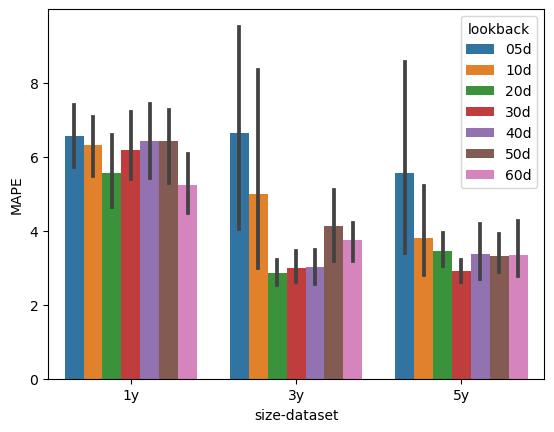

In [7]:
sns.barplot(x='size-dataset',y='MAPE', hue='lookback',data=df)
plt.ylim=[0,10]
plt.show()

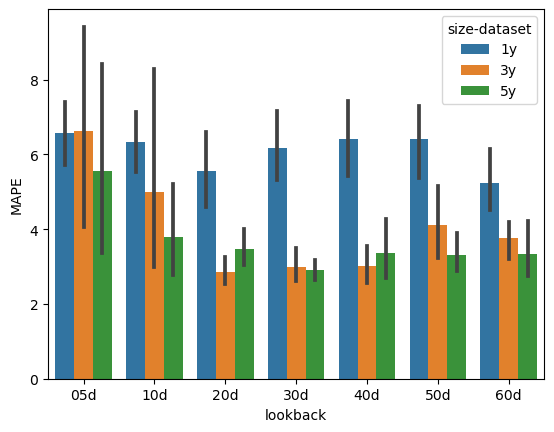

In [8]:
sns.barplot(x='lookback',y='MAPE', hue='size-dataset',data=df[df['MAPE'] <=100])
plt.ylim=[0,10]  
plt.show()

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [10]:
df = df.rename(columns={'size-dataset':'volume'})

In [11]:
# data_files = "D:/Projects/RNNcrypto/dados_tcc/"
# csv_name = 'mba_tcc.csv'

# pd.read_csv(f"{data_files}{csv_name}")

In [12]:
df = df.rename(columns={'RSME':'rsme',
                       'MAPE':'mape'})

In [13]:
df.to_csv("D:/Projects/RNNcrypto/dados_tcc/tcc_mba/mba_resumed.csv")

In [14]:
df.head(3)

,Name,experiment,activation_1,architecture,batch_size,dataset,volume,date_range,lookback,dropout,learning_rate,rsme,mape,loss,epoch,Runtime
79,clean-snowflake-56,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.004115,827.901025,6.543873,0.002280,100,96
80,woven-durian-55,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.008657,625.010095,4.897580,0.001922,100,96
81,dark-dew-54,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.008515,1316.238231,8.386708,0.002148,100,95


In [15]:
df_resumed = df[['volume','lookback','mape']]

df_resumed.head(3)

,volume,lookback,mape
79,1y,05d,6.543873
80,1y,05d,4.897580
81,1y,05d,8.386708


In [16]:
df_resumed.to_csv("D:/Projects/RNNcrypto/dados_tcc/tcc_mba/df_resumed.csv")

In [17]:
df_std = df_resumed.groupby(['volume','lookback']).mean().rename(columns={'mape':'std'}).reset_index()
df_mean = df_resumed.groupby(['volume','lookback']).std().rename(columns={'mape':'mean'}).reset_index()
extractedStd = df_std['std']
df_mean_std = df_mean.join(extractedStd)

df_mean_std.head(3)

,volume,lookback,mean,std
0,1y,05d,1.140214,6.567412
1,1y,10d,1.090813,6.326598
2,1y,20d,1.413333,5.551232


In [18]:
df_mean_std.to_csv("D:/Projects/RNNcrypto/dados_tcc/tcc_mba/df_mean_std.csv")

In [19]:
model = ols('mape ~ volume + lookback + volume:lookback', data=df).fit()

In [20]:
model

In [21]:
anova_results = anova_lm(model, typ=2)

anova_results

,sum_sq,df,F,PR(>F)
volume,143.962547,2.0,24.980684,1.335695e-09
lookback,71.608580,6.0,4.141891,8.959517e-04
volume:lookback,31.266344,12.0,0.904234,5.454008e-01
Residual,302.555111,105.0,NaN,NaN


<h3>Data Visualization</h3>

In [22]:
df.head(3)

,Name,experiment,activation_1,architecture,batch_size,dataset,volume,date_range,lookback,dropout,learning_rate,rsme,mape,loss,epoch,Runtime
79,clean-snowflake-56,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.004115,827.901025,6.543873,0.002280,100,96
80,woven-durian-55,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.008657,625.010095,4.897580,0.001922,100,96
81,dark-dew-54,effect-size-ds,tanh,LSTM,64,BTC-USD,1y,2022-2023,05d,0.1,0.008515,1316.238231,8.386708,0.002148,100,95


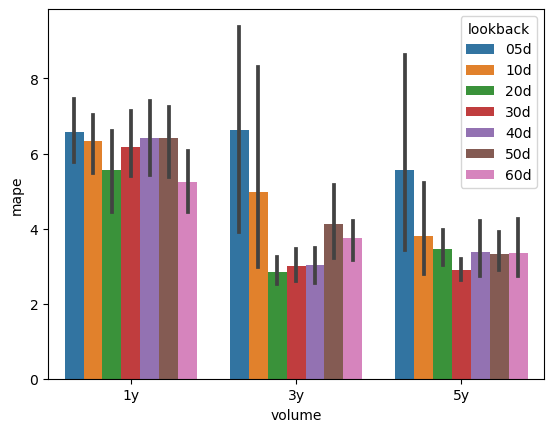

In [23]:
sns.barplot(x='volume',y='mape', hue='lookback',data=df)
plt.ylim=[0,10]
plt.show()

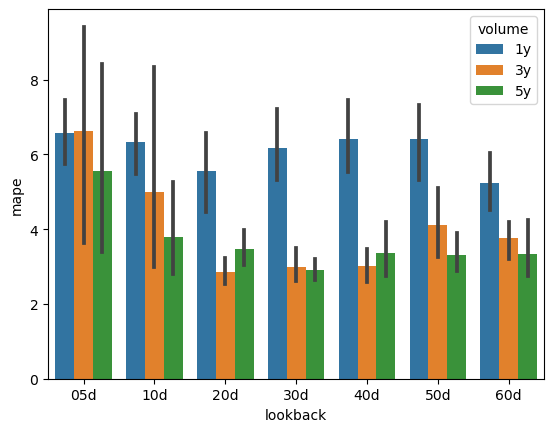

In [24]:
sns.barplot(x='lookback',y='mape', hue='volume',data=df)
plt.ylim=[0,10]
plt.show()

In [25]:
df_mean_std

,volume,lookback,mean,std
0,1y,05d,1.140214,6.567412
1,1y,10d,1.090813,6.326598
2,1y,20d,1.413333,5.551232
3,1y,30d,1.294438,6.173192
4,1y,40d,1.375910,6.421397
5,1y,50d,1.376874,6.416433
6,1y,60d,1.132496,5.243539
7,3y,05d,3.873824,6.637229
8,3y,10d,3.694982,4.983412
9,3y,20d,0.489062,2.851534
